In [1]:
from main import *

Datei öffnen:

In [2]:
audio_arr, sr = openFile(r"C:\Users\Domin\OneDrive\HTW\Bachelorarbeit\WAVTactilTransformer\viblib\v-09-18-2-7.wav")

File C:\Users\Domin\OneDrive\HTW\Bachelorarbeit\WAVTactilTransformer\viblib\v-09-18-2-7.wav exists.


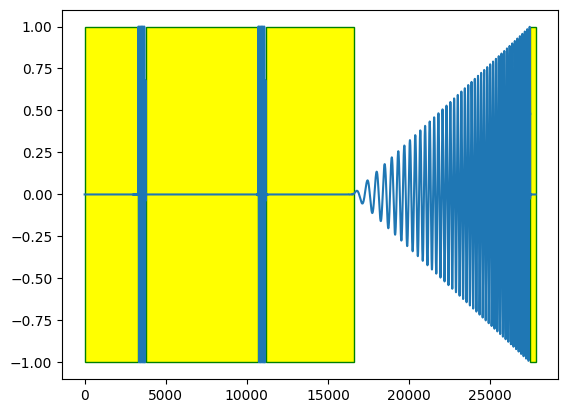

In [3]:
breaks_list = findBreaks(audio_arr=audio_arr) #findet Pausen in Audio Array

c:\Users\Domin\OneDrive\HTW\Bachelorarbeit\WAVTactilTransformer\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Domin\OneDrive\HTW\Bachelorarbeit\WAVTactilTransformer\.venv\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


nan
1
[nan]
nan
1
[nan]
87.57888497512204
22
[         nan  36.46889954  38.86127765  43.36907481  48.12100144
  53.08606969  58.56342784  64.23383055  69.64404506  75.50994501
  80.92955522  86.73814962  92.42821575  98.49155307 103.74716437
 109.9162918  115.1146864  121.25732532 126.99208416 132.99806338
 138.48584976 144.20007402]


ValueError: invalid number of data points (0) specified

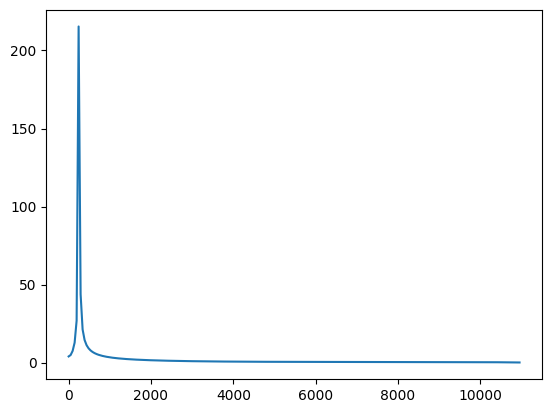

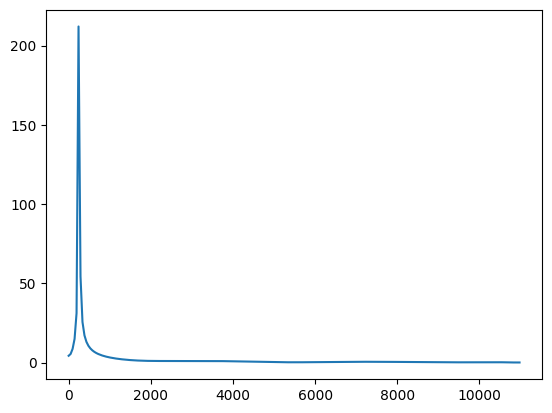

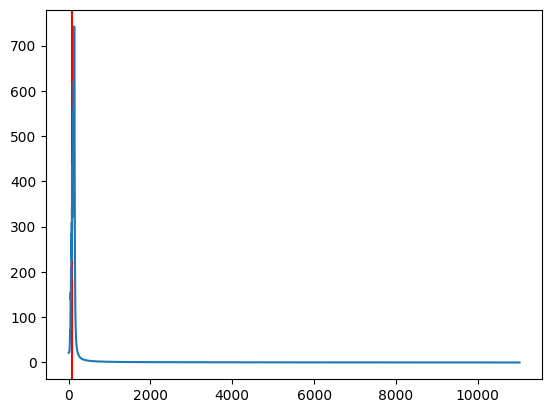

In [4]:
audio_arr_list = splitAudioArrAtBreaks(audio_arr=audio_arr, breaksList=breaks_list)
for audio in audio_arr_list:
  getFrequency(audio,sr)